In [2]:
import requests, zipfile, StringIO
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import pickle
from copy import deepcopy
import seaborn as sns
# Plotting Options
sns.set_style("whitegrid")
sns.despine()

In [3]:
from scipy import signal

In [4]:
def read_csv_zip(filename):
    z = zipfile.ZipFile(filename+'.zip')
    df = pd.read_csv(z.open(filename))
    return df
train = read_csv_zip("train.csv")
test = read_csv_zip("test.csv")

In [5]:
train.head()

row_id       x       y  accuracy    time    place_id
0       0  0.7941  9.0809        54  470702  8523065625
1       1  5.9567  4.7968        13  186555  1757726713
2       2  8.3078  7.0407        74  322648  1137537235
3       3  7.3665  2.5165        65  704587  6567393236
4       4  4.0961  1.1307        31  472130  7440663949

In [6]:
test.head()

row_id       x       y  accuracy    time
0       0  0.1675  1.3608       107  930883
1       1  7.3909  2.5301        35  893017
2       2  8.0978  2.3473        62  976933
3       3  0.9990  1.0591        62  907285
4       4  0.6670  9.7254        40  914399

In [7]:
#plt.boxplot(train["time"])

In [8]:
train_sample = train.sample(frac=0.01)

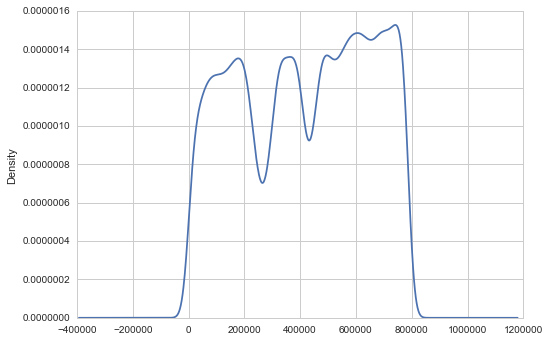

In [9]:
train_sample["time"].plot(kind='kde')

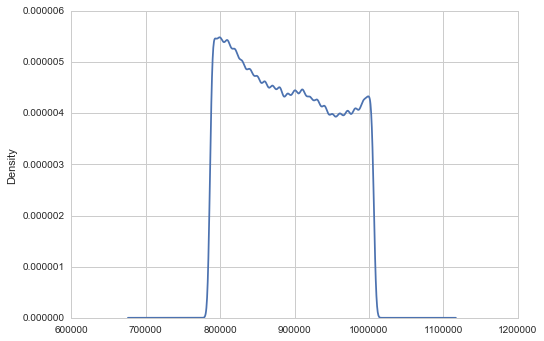

In [10]:
test["time"].plot(kind='kde')

In [11]:
train.describe()

row_id                x                y         accuracy  \
count  29118021.000000  29118021.000000  29118021.000000  29118021.000000   
mean   14559010.000000         4.999770         5.001814        82.849125   
std     8405648.775656         2.857601         2.887505       114.751772   
min           0.000000         0.000000         0.000000         1.000000   
25%     7279505.000000         2.534700         2.496700        27.000000   
50%    14559010.000000         5.009100         4.988300        62.000000   
75%    21838515.000000         7.461400         7.510300        75.000000   
max    29118020.000000        10.000000        10.000000      1033.000000   

                  time      place_id  
count  29118021.000000  2.911802e+07  
mean     417010.364723  5.493787e+09  
std      231176.146498  2.611088e+09  
min           1.000000  1.000016e+09  
25%      203057.000000  3.222911e+09  
50%      433922.000000  5.518573e+09  
75%      620491.000000  7.764307e+09  
max      786239.000000  9.999932e+09

In [12]:
train.dtypes

row_id        int64
x           float64
y           float64
accuracy      int64
time          int64
place_id      int64
dtype: object

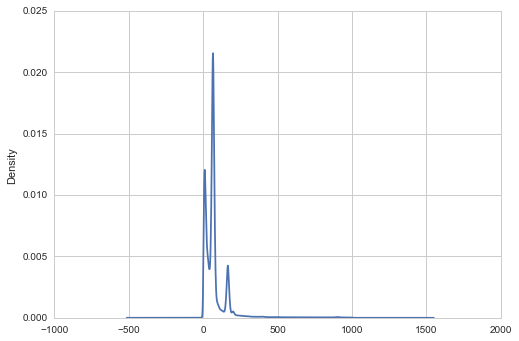

In [13]:
train["accuracy"].plot(kind='kde')

In [14]:
train_sample.describe()

row_id              x              y       accuracy  \
count    291180.000000  291180.000000  291180.000000  291180.000000   
mean   14546089.780957       5.012501       4.996106      82.545824   
std     8418432.028069       2.854754       2.885229     114.389768   
min          93.000000       0.000000       0.000100       1.000000   
25%     7241462.750000       2.558300       2.488275      27.000000   
50%    14529921.000000       5.024300       4.983350      62.000000   
75%    21850806.000000       7.467100       7.501625      75.000000   
max    29118000.000000      10.000000       9.999600    1015.000000   

                time      place_id  
count  291180.000000  2.911800e+05  
mean   416839.494646  5.482870e+09  
std    231263.495074  2.611804e+09  
min         8.000000  1.000016e+09  
25%    202463.750000  3.208036e+09  
50%    433388.000000  5.498948e+09  
75%    620121.250000  7.755146e+09  
max    786233.000000  9.999932e+09

In [15]:
top10place = train["place_id"].value_counts()[:10]

In [16]:
top10placeId = list(top10place.index)

In [17]:
train["place_id"].nunique()

108390

(array([  2.01900000e+03,   1.66600000e+03,   2.76100000e+03,
          6.26600000e+03,   1.18000000e+04,   1.01510000e+04,
          8.34100000e+03,   6.55100000e+03,   5.78600000e+03,
          4.54900000e+03,   4.07400000e+03,   3.45100000e+03,
          3.03900000e+03,   2.70700000e+03,   2.53200000e+03,
          2.05300000e+03,   1.95100000e+03,   1.68700000e+03,
          1.75100000e+03,   1.46200000e+03,   1.40300000e+03,
          1.23200000e+03,   1.17700000e+03,   1.07700000e+03,
          9.82000000e+02,   9.71000000e+02,   8.39000000e+02,
          8.79000000e+02,   7.74000000e+02,   7.66000000e+02,
          6.03000000e+02,   6.85000000e+02,   6.51000000e+02,
          6.12000000e+02,   5.07000000e+02,   5.29000000e+02,
          5.22000000e+02,   5.23000000e+02,   4.09000000e+02,
          4.38000000e+02,   4.11000000e+02,   4.30000000e+02,
          3.66000000e+02,   3.77000000e+02,   3.61000000e+02,
          3.31000000e+02,   2.91000000e+02,   3.24000000e+02,
        

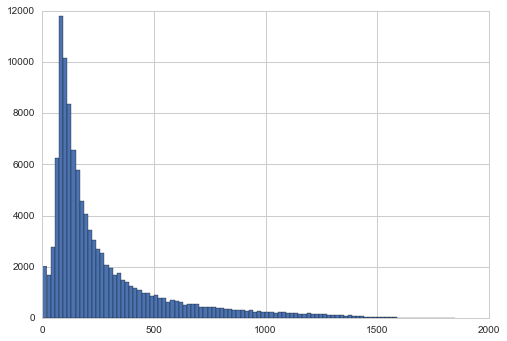

In [18]:
plt.hist(train["place_id"].value_counts(),bins=100)

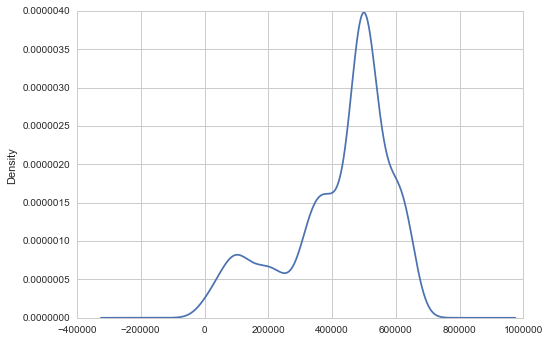

In [19]:
train["time"].loc[train['place_id'] == 8772469670].plot(kind='kde')

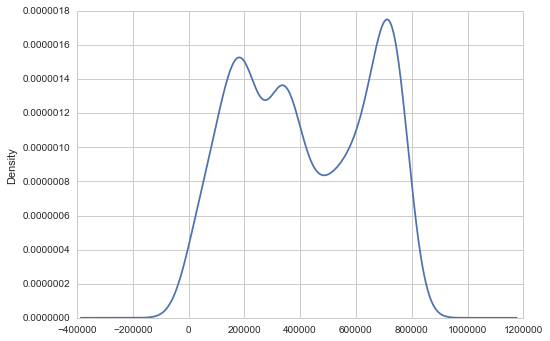

In [20]:
train["time"].loc[train['place_id'] == 1623394281].plot(kind='kde')

to figure out the unit of timestamp using fourier transformation

In [21]:
hist_time = np.histogram(train["time"],5000)


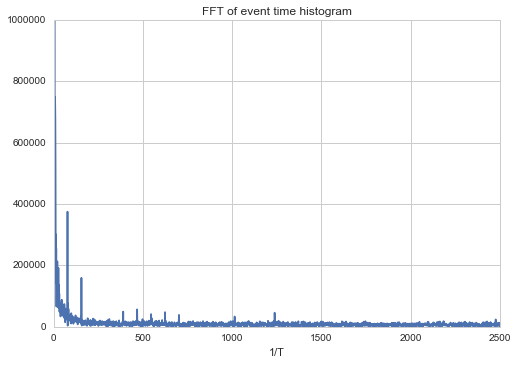

In [22]:
hist_time_fft=np.absolute(np.fft.fft(hist_time[0]))
plt.plot(hist_time_fft)
plt.xlim([0,2500])
plt.ylim([0,1e6])
plt.title('FFT of event time histogram')
plt.xlabel('1/T')
plt.grid(True)
plt.show()

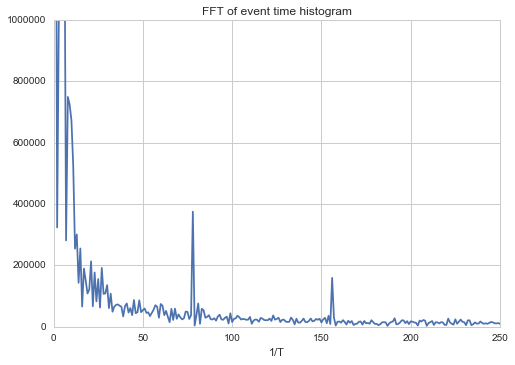

In [23]:
plt.plot(hist_time_fft)
plt.xlim([0,250])
plt.ylim([0,1e6])
plt.title('FFT of event time histogram')
plt.xlabel('1/T')
plt.grid(True)
plt.show()

following function return index of the largest 5 element, return valued need to be +50 to get to the 1/T corrresponding to the above graph

In [24]:
np.argpartition(hist_time_fft[50:250],-5)[-5:]

array([  7,  10, 106,  28,  31])

the correponding values are 57, 60, 166, 78, 81

In [25]:
hist_time[0].max()

8156

In [26]:
hist_time[0].min()

2628

In [27]:
hist_time[1].max()

786239.0

In [28]:
hist_time_fft

array([ 29118021.        ,   2267553.72211346,    323711.42338648, ...,
         1048894.75309114,    323711.42338648,   2267553.72211346])

large peak at 1/T 78

In [29]:
train["time"].max()/78

10079

small peak at 1/T 166

In [31]:
train["time"].max()/166

4736

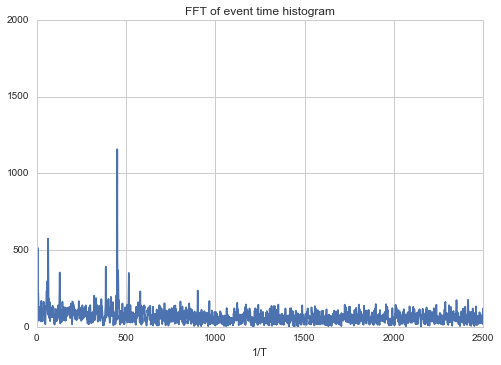

In [32]:
hist_time8772469670 = np.histogram(train["time"].loc[train['place_id'] == 8772469670],5000)
hist_time_fft8772469670 = np.absolute(np.fft.fft(hist_time8772469670[0]))
plt.plot(hist_time_fft8772469670)
plt.xlim([0,2500])
# plt.ylim([0,1e6])
plt.title('FFT of event time histogram')
plt.xlabel('1/T')
plt.grid(True)
plt.show()

In [33]:
top5 = np.argpartition(hist_time_fft8772469670[:2500],-5)[-5:]
top5

array([  5,  64,   1, 451,   0])

In [34]:
print "period weekly",train["time"].loc[train['place_id'] == 8772469670].max()/64
print "period daily",train["time"].loc[train['place_id'] == 8772469670].max()/451

period weekly 10151
period daily 1440


timeseris for check in with time for top 10 places

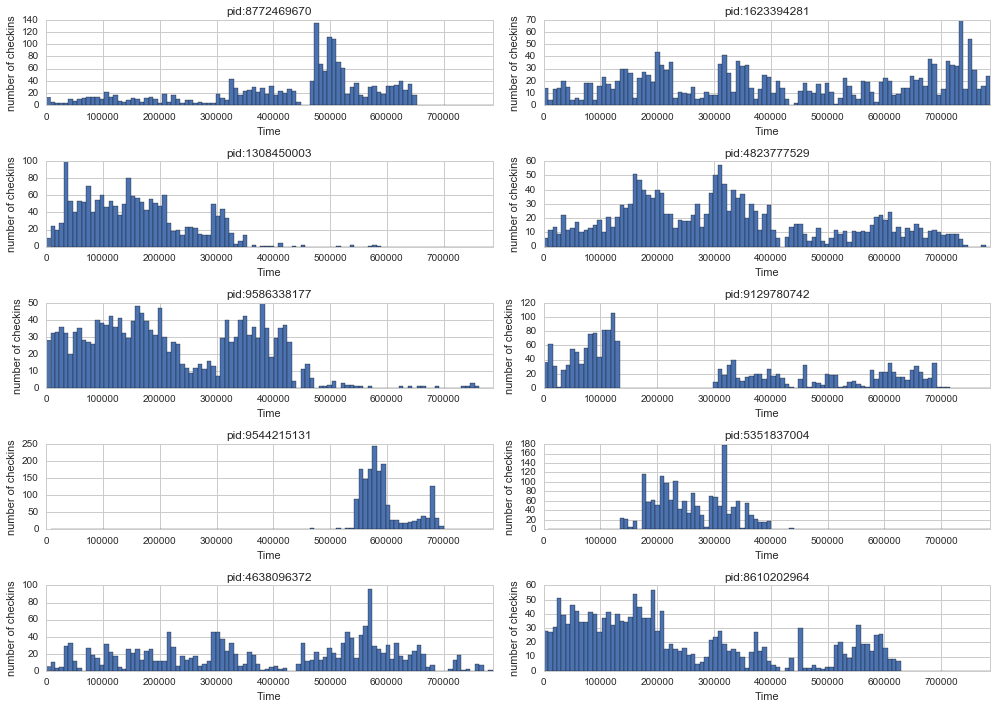

In [35]:
#plot the whole time series
plt.figure(1,figsize=(14,10))
def ts_top_places(num_places,topPlaceId,range_in_time):
    for i in range(len(topPlaceId)):
        train_place = train.loc[train['place_id'] == topPlaceId[i]]
        plt.subplot(num_places/2,2,i+1)
        plt.hist(train_place['time'],bins=100,range=range_in_time)
        plt.xlim(range_in_time[0],range_in_time[1])
        plt.xlabel("Time")
        plt.ylabel("number of checkins")
        plt.title("pid:"+str(topPlaceId[i]))
    plt.tight_layout()
    plt.show()

ts_top_places(10,top10placeId,(train["time"].min(),train["time"].max()))                  
        
        

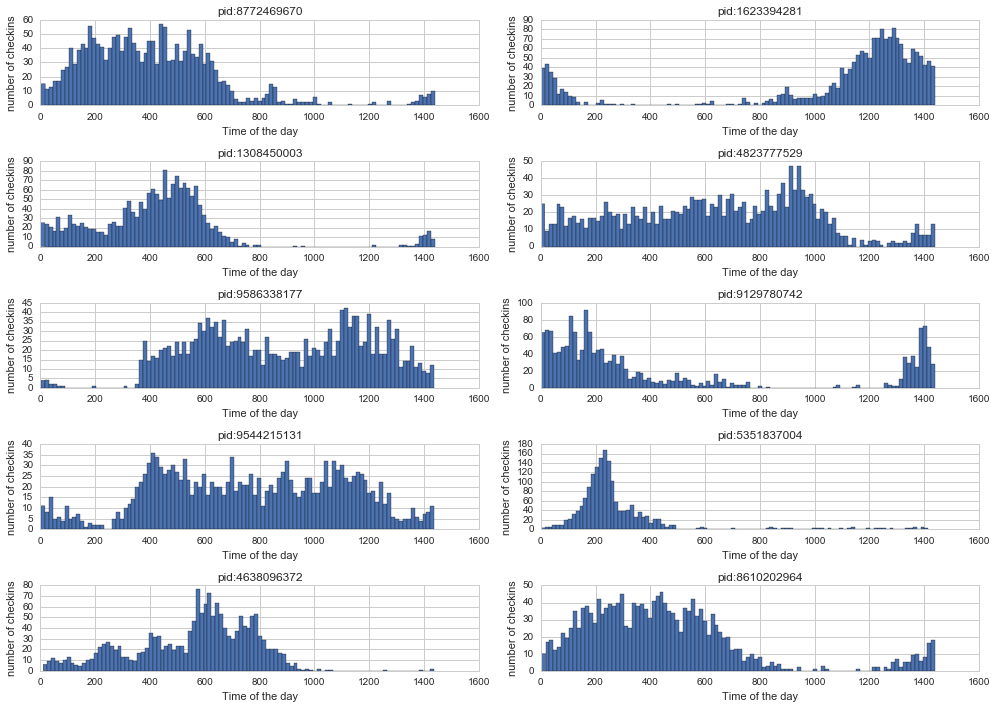

In [36]:
#plot the within-day variation
plt.figure(2,figsize=(14,10))
def tod_top_places(num_places,topPlaceId,range_in_time):
    for i in range(len(topPlaceId)):
        train_place = train.loc[train['place_id'] == topPlaceId[i]]
        plt.subplot(num_places/2,2,i+1)
        plt.hist(train_place['time']%(60*24),bins=100)
        plt.xlabel("Time of the day")
        plt.ylabel("number of checkins")
        plt.title("pid:"+str(topPlaceId[i]))
    plt.tight_layout()
    plt.show()

tod_top_places(10,top10placeId,(train["time"].min(),train["time"].max()))      

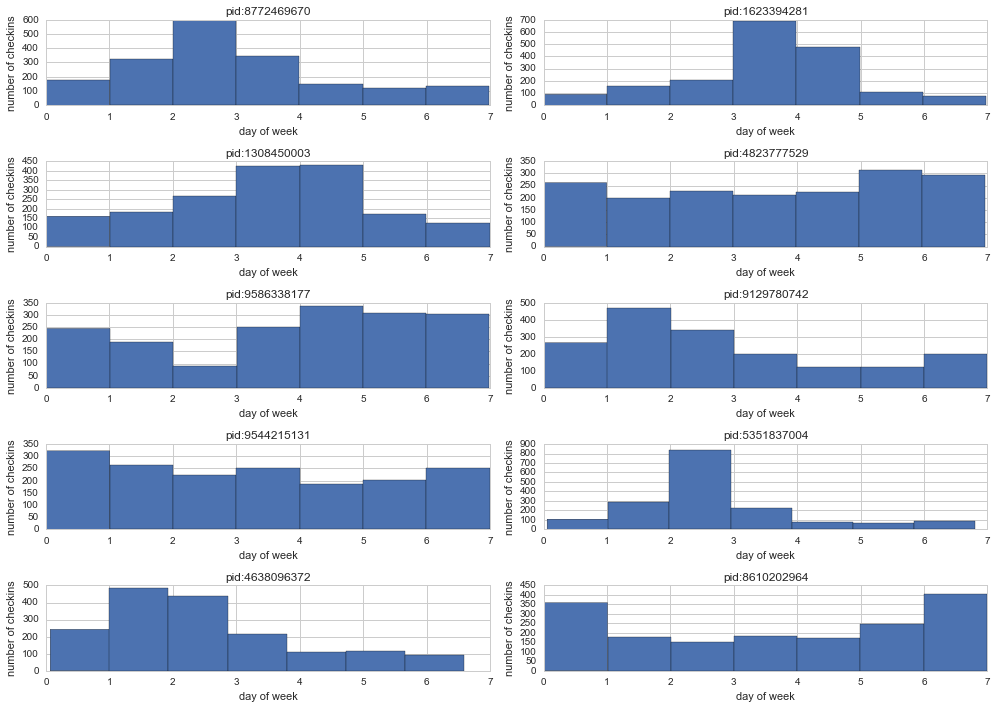

In [37]:
#plot the within-week variation
plt.figure(3,figsize=(14,10))
def dow_top_places(num_places,topPlaceId):
    for i in range(len(topPlaceId)):
        train_place = train.loc[train['place_id'] == topPlaceId[i]]
        plt.subplot(num_places/2,2,i+1)
        plt.hist(train_place['time']%(60*24*7)/(60*24),bins=7)
        plt.xlabel("day of week")
        plt.ylabel("number of checkins")
        plt.title("pid:"+str(topPlaceId[i]))
    plt.tight_layout()
    plt.show()

dow_top_places(10,top10placeId)   

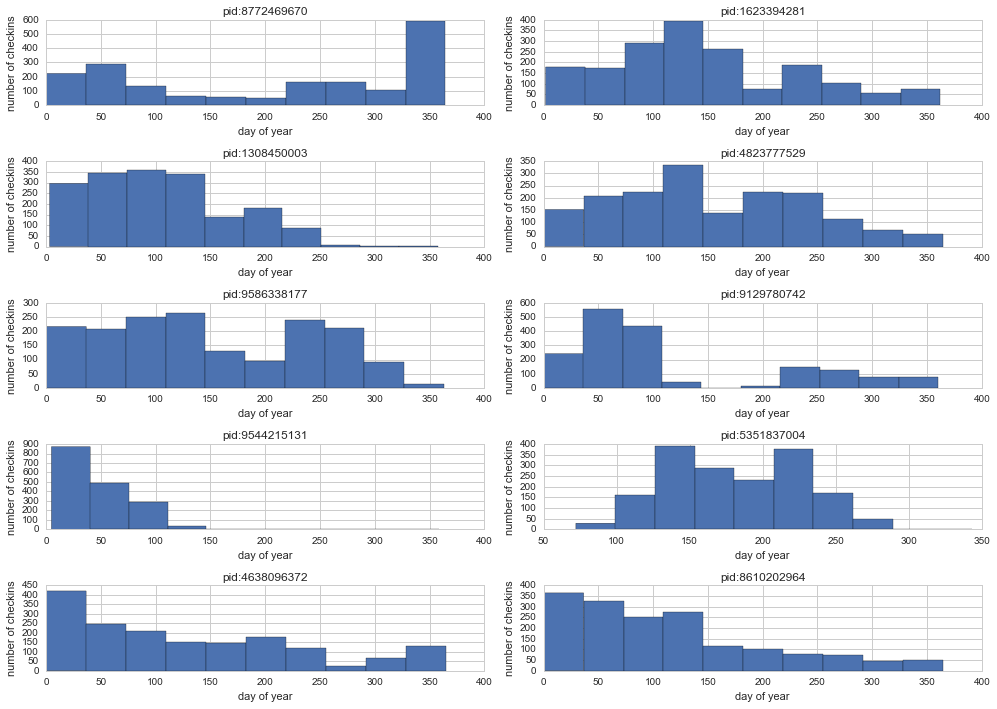

In [38]:
#plot the day of year variation
plt.figure(4,figsize=(14,10))
def doy_top_places(num_places,topPlaceId):
    for i in range(len(topPlaceId)):
        train_place = train.loc[train['place_id'] == topPlaceId[i]]
        plt.subplot(num_places/2,2,i+1)
        plt.hist(train_place['time']%(60*24*365)/(60*24))
        plt.xlabel("day of year")
        plt.ylabel("number of checkins")
        plt.title("pid:"+str(topPlaceId[i]))
    plt.tight_layout()
    plt.show()

doy_top_places(10,top10placeId)   

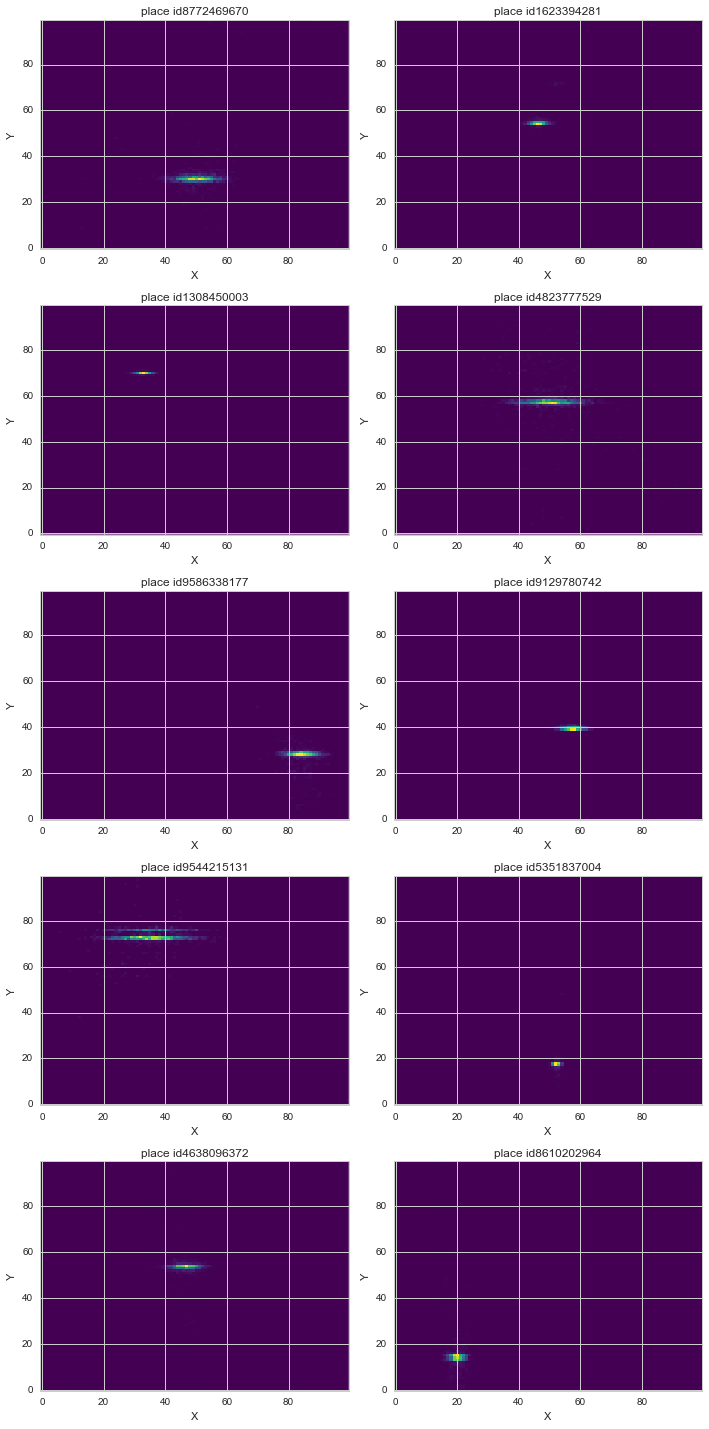

In [39]:
plt.figure(5,figsize = (10,20))
cmapm = plt.cm.viridis
cmapm.set_bad("0.5",1.)

def checkin_loc(num_places,topPlaceId):
    for i in range(len(topPlaceId)):
        train_place = train.loc[train['place_id'] == topPlaceId[i]]
        counts,binsX,binsY = np.histogram2d(train_place["x"],train_place["y"],bins=100)
        plt.subplot(num_places/2,2,i+1)
        plt.imshow(counts,
                   interpolation='none',
                   origin='lower',
                   #extent=extent,
                   aspect="auto",
                   cmap=cmapm)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("place id" + str(topPlaceId[i]))
    plt.tight_layout()
    plt.show()

checkin_loc(10,top10placeId)
        
        

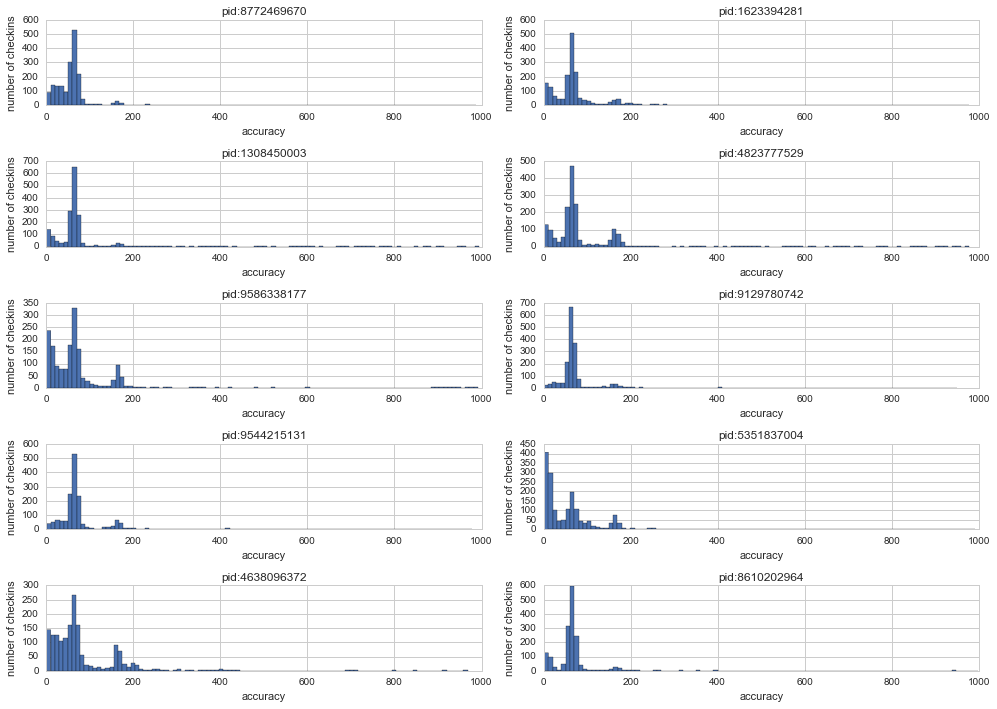

In [41]:
#plot the day of year variation
plt.figure(4,figsize=(14,10))
def accuracy_top_places(num_places,topPlaceId):
    for i in range(len(topPlaceId)):
        train_place = train.loc[train['place_id'] == topPlaceId[i]]
        plt.subplot(num_places/2,2,i+1)
        plt.hist(train_place['accuracy'],bins=100)
        plt.xlabel("accuracy")
        plt.ylabel("number of checkins")
        plt.title("pid:"+str(topPlaceId[i]))
    plt.tight_layout()
    plt.show()

accuracy_top_places(10,top10placeId)   

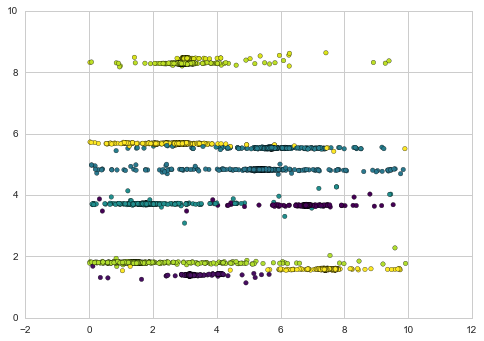

In [44]:
train_top10 = train.loc[train['place_id'].isin(top10placeId)]
plt.scatter(train_top10["x"],train_top10["y"],c=train_top10['place_id'],cmap='viridis')